c:\Users\acer\OneDrive\Desktop\ML_CW\Python-for-Machine-Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\acer\OneDrive\Desktop\ML_CW\Python-for-Machine-Learning\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\acer\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Py

Valid words: ['man', 'woman', 'king', 'boy', 'girl', 'father', 'mother', 'brother', 'husband', 'wife', 'male', 'female']


c:\Users\acer\OneDrive\Desktop\ML_CW\Python-for-Machine-Learning\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


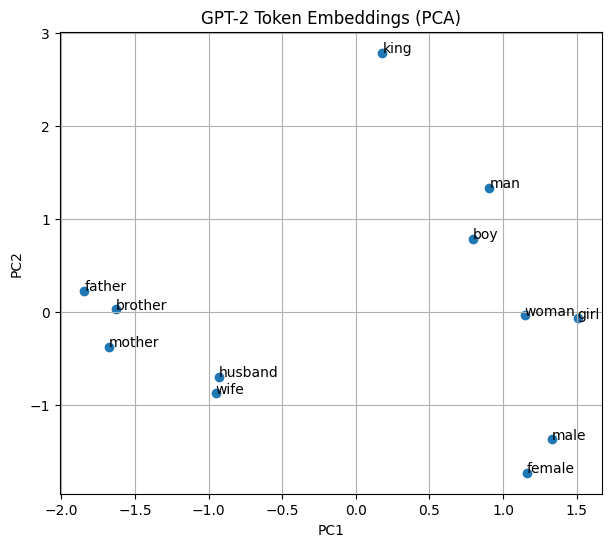

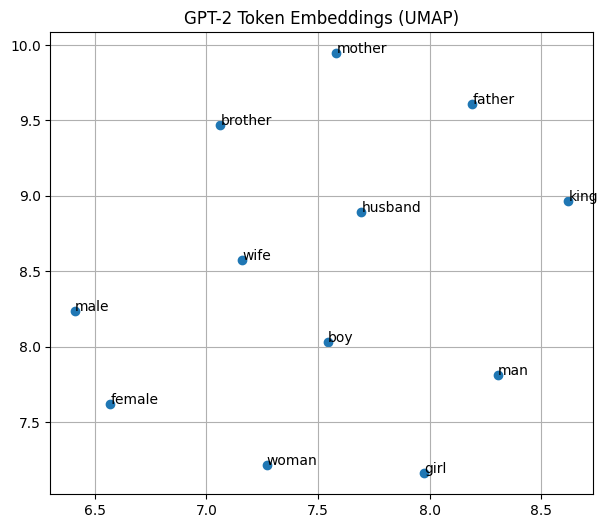


Analogy test:
cosine((king - man + woman), queen) = 0.27779734


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.decomposition import PCA
import umap

# -----------------------------
# 1. Load GPT-2 model & tokenizer
# -----------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")
model.eval()

# -----------------------------
# 2. Extract embedding matrix
# -----------------------------
# Shape: (vocab_size, embedding_dim)
embedding_matrix = model.wte.weight.detach().cpu().numpy()

# -----------------------------
# 3. Small dataset of words (single-token words)
# -----------------------------
words = [
    "man", "woman",
    "king", "queen",
    "prince", "princess",
    "boy", "girl",
    "father", "mother",
    "brother", "sister",
    "husband", "wife",
    "male", "female"
]

# Keep only words that map to exactly ONE token
valid_words = []
token_ids = []

for w in words:
    tokens = tokenizer.encode(w)
    if len(tokens) == 1:
        valid_words.append(w)
        token_ids.append(tokens[0])

print("Valid words:", valid_words)

# Extract vectors
vectors = embedding_matrix[token_ids]

# -----------------------------
# 4. Dimensionality reduction
# -----------------------------
# Option A: PCA (keeps linear structure)
pca = PCA(n_components=2)
vectors_2d_pca = pca.fit_transform(vectors)

# Option B: UMAP (better semantic clusters)
umap_reducer = umap.UMAP(
    n_neighbors=10,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)
vectors_2d_umap = umap_reducer.fit_transform(vectors)

# -----------------------------
# 5. Plot PCA
# -----------------------------
plt.figure(figsize=(7, 6))
plt.scatter(vectors_2d_pca[:, 0], vectors_2d_pca[:, 1])

for i, w in enumerate(valid_words):
    plt.annotate(w, (vectors_2d_pca[i, 0], vectors_2d_pca[i, 1]))

plt.title("GPT-2 Token Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# -----------------------------
# 6. Plot UMAP
# -----------------------------
plt.figure(figsize=(7, 6))
plt.scatter(vectors_2d_umap[:, 0], vectors_2d_umap[:, 1])

for i, w in enumerate(valid_words):
    plt.annotate(w, (vectors_2d_umap[i, 0], vectors_2d_umap[i, 1]))

plt.title("GPT-2 Token Embeddings (UMAP)")
plt.grid(True)
plt.show()

# -----------------------------
# 7. Analogy test: king - man + woman
# -----------------------------
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_vector(word):
    token_id = tokenizer.encode(word)[0]
    return embedding_matrix[token_id]

king = get_vector("king")
man = get_vector("man")
woman = get_vector("woman")
queen = get_vector("queen")

analogy_vector = king - man + woman

similarity = cosine_similarity(analogy_vector, queen)

print("\nAnalogy test:")
print("cosine((king - man + woman), queen) =", similarity)
